In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_style("ticks")
palette = sns.color_palette('deep')

In [16]:
var_1 = 1.5
var_2 = 3.0
rho = -0.6
off_diag = np.sqrt(var_1 * var_2) * rho


mu = np.array([0.5, 0.2])
cov = np.array([[var_1, off_diag], \
       [off_diag, var_2]])

rv = multivariate_normal(mu, cov)

# Generate random samples from this multivariate normal (largely for plotting!)
data = rv.rvs(8500)
df = pd.DataFrame({'$x$': data[:,0].flatten(), '$y$': data[:,1].flatten()})

In [17]:
# Now, to plot the conditional distribution of $X_1$ at $X_2=5.0$, we would have
def calculate_conditional(mu, cov, yy):
    new_mu = mu[0] + cov[0,1] * (cov[1,1])**(-1) * (yy - mu[1])
    new_var =  cov[0,0] - cov[0,1] * (cov[1,1])**(-1) * cov[0,1]
    return new_mu, new_var

y_new = 3.7
cond_mu, cond_var = calculate_conditional(mu, cov, y_new)

In [18]:
X_samples = np.tile( np.linspace(-10, 10, 200).reshape(200,1) , (1, 2))
X_samples[:,1] = X_samples[:,1]* 0 + y_new

f_X = rv.pdf(X_samples)
rv2 = multivariate_normal(cond_mu, cond_var)
f_X1 = rv2.pdf(X_samples[:,0])

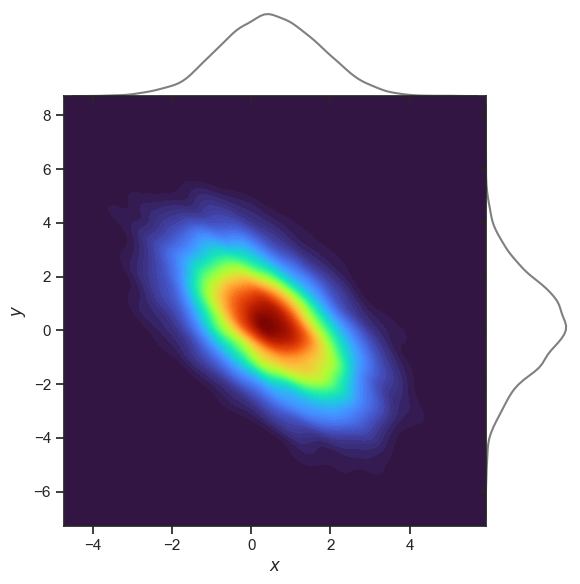

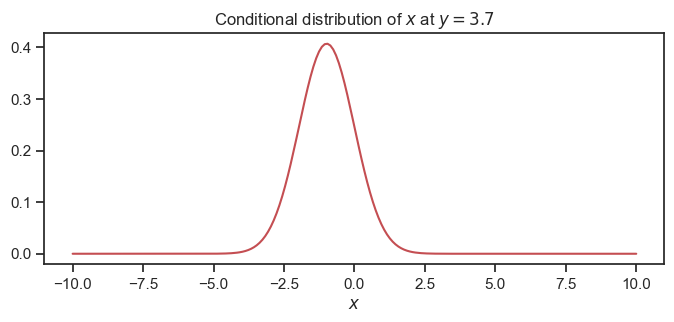

In [19]:
# Plot!
g = sns.JointGrid(data=df, x="$x$", y="$y$", space=0)
g.plot_joint(sns.kdeplot, fill=True,  cmap="turbo", thresh=0, levels=100)
g.plot_marginals(sns.kdeplot, color="grey", gridsize=100)
plt.show()

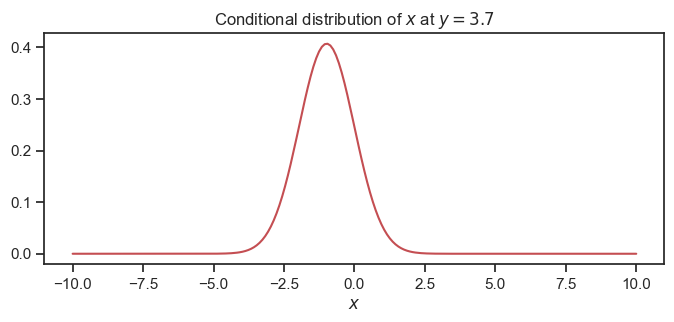

In [20]:
fig = plt.figure(figsize=(8,3))
plt.plot(X_samples[:,0], f_X1, 'r-')
plt.xlabel('$x$')
plt.title('Conditional distribution of $x$ at $y=3.7$')
plt.savefig('fig.png', dpi=150, bbox_inches='tight')
plt.show()

In [21]:
cov

array([[ 1.5       , -1.27279221],
       [-1.27279221,  3.        ]])